In [14]:
#I imported all the basic packages I might need to use just as a starting point.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#Ensured all the data was moved from Excel to a dataframe. Some files required skipping rows to get to the data. Maintained a common nomenclature in snake case
Atlanta_CPI = pd.read_excel('Atlanta - CPI.xlsx')
Baltimore_CPI = pd.read_excel('Baltimore - CPI.xlsx', skiprows=11)
Boston_CPI = pd.read_excel('Boston - CPI.xlsx', skiprows=11)
Chicago_CPI = pd.read_excel('Chicago - CPI.xlsx', skiprows=11)
Denver_CPI = pd.read_excel('Denver - CPI.xlsx', skiprows=11)
Detroit_CPI = pd.read_excel('Detroit - CPI.xlsx', skiprows=11)
DFW_CPI = pd.read_excel('DFW - CPI.xlsx', skiprows=11)
Houston_CPI = pd.read_excel('Houston - CPI.xlsx', skiprows=11)
Hawaii_CPI = pd.read_excel('Hawaii - CPI.xlsx', skiprows=11)
LA_CPI = pd.read_excel('LA  - CPI.xlsx', skiprows=11)
Miami_CPI = pd.read_excel('Miami - CPI.xlsx', skiprows=11)
Minneapolis_CPI = pd.read_excel('Minneaplois - cPI.xlsx', skiprows=11)
NYC_CPI = pd.read_excel('NYC - CPI.xlsx', skiprows=11)
Philadelphia_CPI = pd.read_excel('Philadelphia - CPI.xlsx', skiprows=11)
Phoenix_CPI = pd.read_excel('Pheonix - CPI.xlsx', skiprows=11)
Riverside_CPI = pd.read_excel('Riverside - CPI.xlsx', skiprows=11)
SanDiego_CPI = pd.read_excel('San Diego - CPI.xlsx', skiprows=11)
SanFrancisco_CPI = pd.read_excel('San Francisco - CPI.xlsx', skiprows=11)
Seattle_CPI = pd.read_excel('Seattle - CPI.xlsx', skiprows=11)
StLouis_CPI = pd.read_excel('St. Louis - CPI.xlsx', skiprows=11)
Tampa_CPI = pd.read_excel('Tampa - CPI.xlsx', skiprows=11)
WashingtonDC_CPI = pd.read_excel('Washington DC - CPI.xlsx', skiprows=11)

C:\Users\camer\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\camer\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\camer\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\camer\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl'

In [16]:
# The Baltimore list was missing annual amounts, so I ensured for the null annual amounts it averaged out from the month columns, then rounded it to three decimal places for consistency in the data.
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

mask_annual_na = Baltimore_CPI['Annual'].isna()
Baltimore_CPI.loc[mask_annual_na, 'Annual'] = (
    Baltimore_CPI.loc[mask_annual_na, months].mean(axis=1, skipna=True).round(3)
)

In [17]:
#Fix the Riverside data for 2017 where the annual value is missing, by using the December value for that year.
mask_riverside_2017 = (Riverside_CPI['Year'] == 2017) & Riverside_CPI['Annual'].isna()
Riverside_CPI.loc[mask_riverside_2017, 'Annual'] = Riverside_CPI.loc[mask_riverside_2017, 'Dec']


In [18]:
#The Washington DC list was missing annual amounts, so I ensured for the null annual amounts it averaged out from the month columns, then rounded it to three decimal places for consistency in the data.
mask_dc_na = WashingtonDC_CPI['Annual'].isna()
WashingtonDC_CPI.loc[mask_dc_na, 'Annual'] = (
    WashingtonDC_CPI.loc[mask_dc_na, months].mean(axis=1, skipna=True).round(3)
)

In [19]:
#Filtered out all columns except for Year and Annual columns.
Atlanta_CPI_Final = Atlanta_CPI[['Year','Annual']]
Baltimore_CPI_Final = Baltimore_CPI[['Year','Annual']]
Boston_CPI_Final = Boston_CPI[['Year','Annual']]
Chicago_CPI_Final = Chicago_CPI[['Year','Annual']]
Denver_CPI_Final = Denver_CPI[['Year','Annual']]
Detroit_CPI_Final = Detroit_CPI[['Year','Annual']]
DFW_CPI_Final = DFW_CPI[['Year','Annual']]
Houston_CPI_Final = Houston_CPI[['Year','Annual']]
Hawaii_CPI_Final = Hawaii_CPI[['Year','Annual']]
LA_CPI_Final = LA_CPI[['Year','Annual']]
Miami_CPI_Final = Miami_CPI[['Year','Annual']]
Minneapolis_CPI_Final = Minneapolis_CPI[['Year','Annual']]
NYC_CPI_Final = NYC_CPI[['Year','Annual']]
Philadelphia_CPI_Final = Philadelphia_CPI[['Year','Annual']]
Phoenix_CPI_Final = Phoenix_CPI[['Year','Annual']]
Riverside_CPI_Final = Riverside_CPI[['Year','Annual']]
SanDiego_CPI_Final = SanDiego_CPI[['Year','Annual']]
SanFrancisco_CPI_Final = SanFrancisco_CPI[['Year','Annual']]
Seattle_CPI_Final = Seattle_CPI[['Year','Annual']]
StLouis_CPI_Final = StLouis_CPI[['Year','Annual']]
Tampa_CPI_Final = Tampa_CPI[['Year','Annual']]
WashingtonDC_CPI_Final = WashingtonDC_CPI[['Year','Annual']]

In [20]:
#Created a Master List of all the annuals with respect to Year by merging on Year column, and renaming the Annual columns to their respective city names.
city_final_dfs = {
    "Atlanta": Atlanta_CPI_Final,
    "Baltimore": Baltimore_CPI_Final,
    "Boston": Boston_CPI_Final,
    "Chicago": Chicago_CPI_Final,
    "Denver": Denver_CPI_Final,
    "Detroit": Detroit_CPI_Final,
    "DFW": DFW_CPI_Final,
    "Houston": Houston_CPI_Final,
    "Honolulu": Hawaii_CPI_Final,
    "Los Angeles": LA_CPI_Final,
    "Miami": Miami_CPI_Final,
    "Minneapolis": Minneapolis_CPI_Final,
    "New York": NYC_CPI_Final,
    "Philadelphia": Philadelphia_CPI_Final,
    "Phoenix": Phoenix_CPI_Final,
    "Riverside": Riverside_CPI_Final,
    "San Diego": SanDiego_CPI_Final,
    "San Francisco": SanFrancisco_CPI_Final,
    "Seattle": Seattle_CPI_Final,
    "St. Louis": StLouis_CPI_Final,
    "Tampa": Tampa_CPI_Final,
    "WashingtonDC": WashingtonDC_CPI_Final,
}

Master_CPI_Annual = None

for city, df in city_final_dfs.items():
    temp = df.copy()
    temp = temp.rename(columns={"Annual": city})
    if Master_CPI_Annual is None:
        Master_CPI_Annual = temp
    else:
        Master_CPI_Annual = pd.merge(Master_CPI_Annual, temp, on="Year", how="outer")

Master_CPI_Annual = Master_CPI_Annual.sort_values("Year").reset_index(drop=True)
Master_CPI_Annual

,Year,Atlanta,Baltimore,Boston,Chicago,Denver,Detroit,DFW,Houston,Honolulu,...,New York,Philadelphia,Phoenix,Riverside,San Diego,San Francisco,Seattle,St. Louis,Tampa,WashingtonDC
0,2012,212.782,232.415,247.733,222.005,224.568,216.082,212.227,204.213,249.474,...,252.588,238.097,124.197,NaN,256.961,239.650,238.663,214.768,203.637,242.223
1,2013,216.267,235.795,251.139,224.545,230.791,219.481,215.995,207.574,253.924,...,256.833,240.900,125.782,NaN,260.317,245.023,241.563,217.965,206.786,245.955
2,2014,220.969,240.163,255.184,228.468,237.200,221.784,218.392,213.365,257.589,...,260.230,244.050,127.823,NaN,265.145,251.985,246.018,220.217,210.815,249.774
3,2015,221.631,240.662,256.715,227.792,239.990,218.706,217.500,213.039,260.165,...,260.558,243.858,128.019,NaN,269.436,258.572,249.364,219.321,211.557,250.664
4,2016,225.463,244.039,260.496,229.302,246.643,222.167,220.677,216.414,265.283,...,263.365,245.290,130.107,NaN,274.732,266.344,254.886,221.075,214.037,253.422
5,2017,232.887,248.638,267.033,233.611,254.995,226.896,226.103,220.657,272.014,...,268.520,248.423,133.324,100.000,283.012,274.924,262.668,224.747,219.461,256.221
6,2018,238.577,253.392,275.815,237.706,261.958,232.250,232.788,225.927,277.078,...,273.641,251.563,138.875,102.732,292.547,285.550,271.089,228.852,224.263,261.445
7,2019,243.731,256.887,281.082,241.181,266.999,235.267,237.732,228.799,281.585,...,278.164,256.621,142.920,105.697,299.433,295.004,277.984,231.187,228.134,264.777
8,2020,246.653,259.476,284.266,243.873,272.207,237.659,239.081,229.161,286.008,...,282.920,258.923,145.724,107.672,303.932,300.084,282.693,232.906,233.844,267.157
9,2021,261.633,270.207,293.521,254.159,281.845,247.805,251.620,238.975,296.818,...,292.303,269.371,153.032,113.875,319.761,309.721,295.560,245.820,247.951,277.728


In [21]:
#Created a linear and exponential regression to see which was the best fit to the data.
riverside = Riverside_CPI_Final.dropna(subset=['Annual']).copy()
x = riverside['Year'].values.astype(float)
y = riverside['Annual'].values.astype(float)

m_lin, c_lin = np.polyfit(x, y, 1)
y_lin_pred = m_lin * x + c_lin
ss_res_lin = np.sum((y - y_lin_pred) ** 2)
ss_tot = np.sum((y - y.mean()) ** 2)
r2_lin = 1 - ss_res_lin / ss_tot

x0_ref = x.min()
log_y = np.log(y)
B_exp, ln_A_exp = np.polyfit(x - x0_ref, log_y, 1)
A_exp = np.exp(ln_A_exp)
y_exp_pred = A_exp * np.exp(B_exp * (x - x0_ref))
ss_res_exp = np.sum((y - y_exp_pred) ** 2)
r2_exp = 1 - ss_res_exp / ss_tot

print(f"Linear regression R-squared for Riverside CPI: {r2_lin:.4f}")
print(f"Exponential regression R-squared for Riverside CPI: {r2_exp:.4f}")


Linear regression R-squared for Riverside CPI: 0.9333
Exponential regression R-squared for Riverside CPI: 0.9486


In [22]:
#Using the exponential regression as it had a higher R-squared value to predict the missing years from 2012 to 2016 for Riverside CPI data.
from scipy.optimize import curve_fit


def exp_model(x, a, b):
    return a * np.exp(b * x)


x0 = x - x.min()

params, _ = curve_fit(exp_model, x0, y)
a, b = params  # now a and b are defined
years_fill = np.arange(2012, 2017, dtype=float)
x0_fill = years_fill - x.min()
annual_fill_pred = (a * np.exp(b * x0_fill)).round(3)

pred_2012_2016 = pd.DataFrame({
    'Year': years_fill.astype(int),
    'Annual': annual_fill_pred
})

Riverside_CPI_Pred = (
    pd.concat([pred_2012_2016, Riverside_CPI_Final], ignore_index=True)
    .sort_values('Year')
    .reset_index(drop=True)
)

Riverside_CPI_Pred


,Year,Annual
0,2012,77.675
1,2013,81.260
2,2014,85.010
3,2015,88.933
4,2016,93.038
5,2017,100.000
6,2018,102.732
7,2019,105.697
8,2020,107.672
9,2021,113.875


In [23]:
#Combine the predicted Riverside CPI data back into the Master list, replacing the null Riverside data.
Riverside_CPI_Pred_renamed = Riverside_CPI_Pred.rename(columns={'Annual': 'Riverside'})

Master_CPI_Annual = Master_CPI_Annual.drop(columns=['Riverside'])
Master_CPI_Annual = (
    Master_CPI_Annual
    .merge(Riverside_CPI_Pred_renamed, on='Year', how='left')
    .sort_values('Year')
    .reset_index(drop=True)
)

In [24]:
# Melt the Master_CPI_Annual dataframe to long format for analysis/visualization
Master_CPI_Annual = pd.melt(
    Master_CPI_Annual,
    id_vars=['Year'],
    var_name='City',
    value_name='Annual_CPI'
)

Master_CPI_Annual


,Year,City,Annual_CPI
0,2012,Atlanta,212.782
1,2013,Atlanta,216.267
2,2014,Atlanta,220.969
3,2015,Atlanta,221.631
4,2016,Atlanta,225.463
...,...,...,...
259,2019,Riverside,105.697
260,2020,Riverside,107.672
261,2021,Riverside,113.875
262,2022,Riverside,123.784


In [25]:
#Transformed into Excel

Master_CPI_Annual.to_excel('Master_CPI_Annual.xlsx', index=False)
Master_CPI_Annual


,Year,City,Annual_CPI
0,2012,Atlanta,212.782
1,2013,Atlanta,216.267
2,2014,Atlanta,220.969
3,2015,Atlanta,221.631
4,2016,Atlanta,225.463
...,...,...,...
259,2019,Riverside,105.697
260,2020,Riverside,107.672
261,2021,Riverside,113.875
262,2022,Riverside,123.784


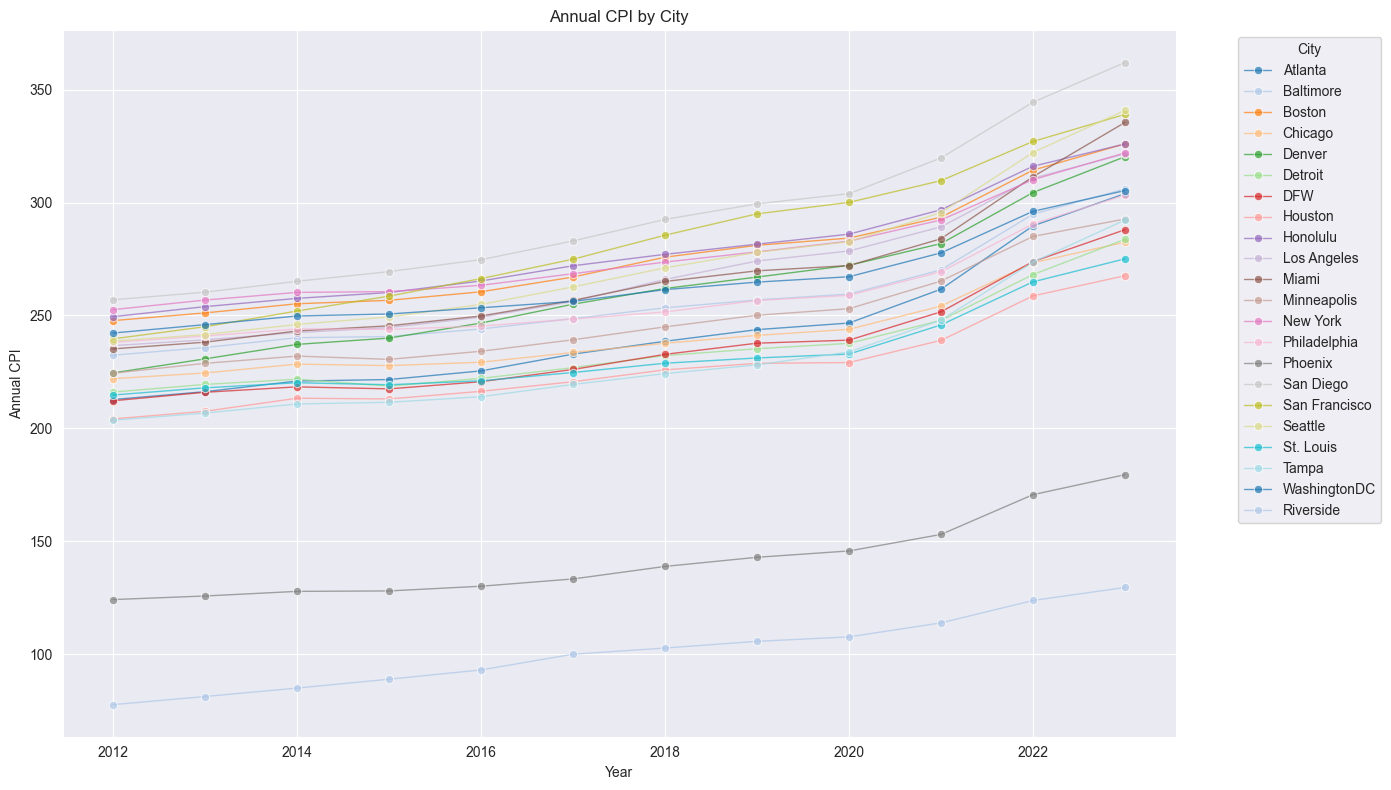

In [26]:
# Line plot with trendlines for each city from Master_CPI_Annual

# Ensure Master_CPI_Annual is in the expected long format with columns: Year, City, Annual_CPI

plt.figure(figsize=(14, 8))

cities = Master_CPI_Annual['City'].unique()
palette = sns.color_palette('tab20', n_colors=len(cities))
color_map = dict(zip(cities, palette))

# Plot the actual CPI values for each city
sns.lineplot(
    data=Master_CPI_Annual,
    x='Year',
    y='Annual_CPI',
    hue='City',
    palette=color_map,
    marker='o',
    linewidth=1,
    alpha=0.7
)

plt.title('Annual CPI by City')
plt.xlabel('Year')
plt.ylabel('Annual CPI')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
